In [1]:
import pandas as pd

# Load the dataset
file_path = "D:/Subjects/Fall 2023/Advanced Business Analytics/Projects/Mini Projects/XYZ_Bank_Deposit_Data_Classification.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(data.head())


  age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"
0  56;"housemaid";"married";"basic.4y";"no";"no";...                                                                                                                                                                          
1  57;"services";"married";"high.school";"unknown...                                                                                                                                                                          
2  37;"services";"married";"high.school";"no";"ye...                                                                                                                                                                          
3  40;"admin.";"married";"basic.6y";"no";"no";"no...                                                        

In [18]:
import pandas as pd

# Load the dataset with the correct delimiter
file_path = 'D:/Subjects/Fall 2023/Advanced Business Analytics/Projects/Mini Projects/XYZ_Bank_Deposit_Data_Classification.csv'
data = pd.read_csv(file_path, delimiter=';')

# Display the first few rows of the dataframe to verify it's loaded correctly
print(data.head())


   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

                age     job  marital          education default housing  \
count   41188.00000   41188    41188              41188   41188   41188   
unique          NaN      12        4                  8       3       3   
top             NaN  admin.  married  university.degree      no     yes   
freq            NaN   10422    24928              12168   32588   21576   
mean       40.02406     NaN      NaN                NaN     NaN     NaN   
std        10.42125     NaN      NaN                NaN     NaN     NaN   
min        17.00000     NaN      NaN                NaN     NaN     NaN   
25%        32.00000     NaN      NaN                NaN     NaN     NaN   
50%        38.00000     NaN      NaN                NaN     NaN     NaN   
75%        47.00000     NaN      NaN                NaN     NaN     NaN   
max        98.00000     NaN      NaN                NaN     NaN     NaN   

         loan   contact  month day_of_week  ...      campaign         pdays  \
count   41188     41

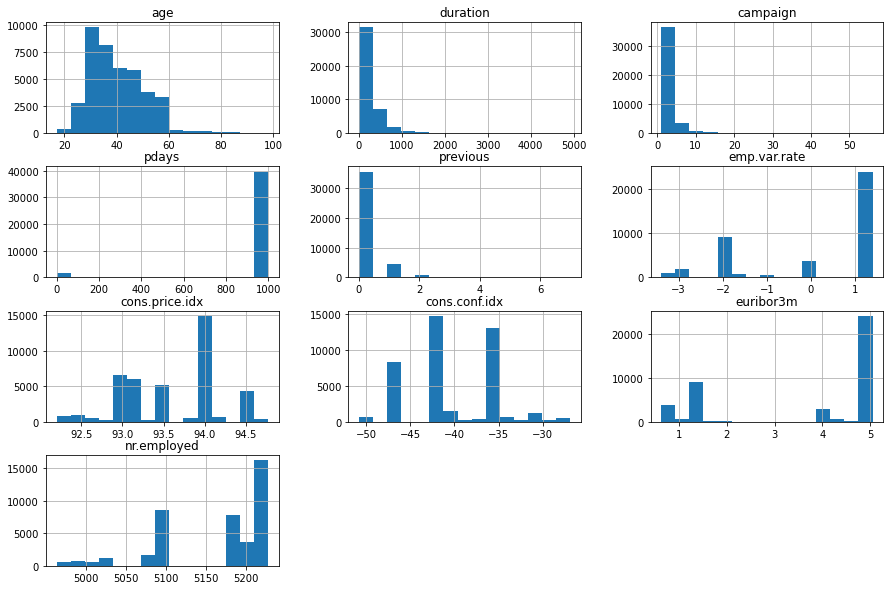

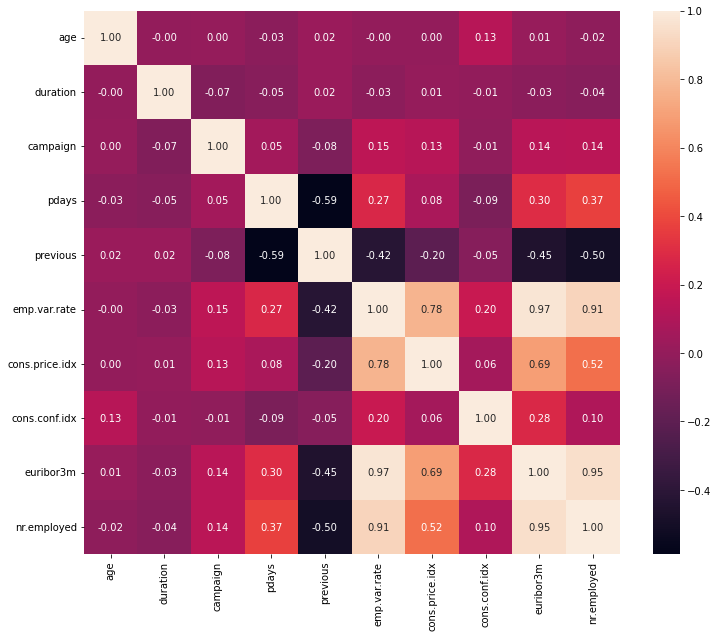

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics for all columns
print(data.describe(include='all'))

# Check for missing values
print(data.isnull().sum())

# Filter only numerical columns for histogram
numerical_columns = data.select_dtypes(include=['number']).columns
data[numerical_columns].hist(bins=15, figsize=(15, 10))
plt.show()

# Correlation heatmap for numerical features only
if len(numerical_columns) > 1:  # Checking if there are at least two numerical columns
    plt.figure(figsize=(12, 10))
    sns.heatmap(data[numerical_columns].corr(), annot=True, fmt=".2f")
    plt.show()


In [20]:
# Print all column names in the DataFrame
print(data.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# The target column is 'y'
target_column = 'y'

# Encoding categorical variables
label_encoders = {}
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Split the data into features and target
X = data.drop(target_column, axis=1)  # Drop the target column 'y'
y = data[target_column]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Optionally, print the first few rows of the training set
print("\nFirst few rows of X_train:")
print(X_train.head())


X_train shape: (28831, 20)
X_test shape: (12357, 20)
y_train shape: (28831,)
y_test shape: (12357,)

First few rows of X_train:
       age  job  marital  education  default  housing  loan  contact  month  \
39075   29    0        1          6        0        0     0        0      2   
34855   29    9        2          6        0        0     0        1      6   
7107    45    1        1          1        1        2     0        1      6   
31614   34    7        1          6        0        0     0        0      6   
34878   32    0        2          3        0        0     0        0      6   

       day_of_week  duration  campaign  pdays  previous  poutcome  \
39075            1        77         3    999         1         0   
34855            0        12         4    999         0         1   
7107             2       277         2    999         0         1   
31614            2        70         1    999         1         0   
34878            0      1181         9    999       

In [34]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
clf = RandomForestClassifier(random_state=42)

# Fit the model on the training data
clf.fit(X_train, y_train)

# Print a confirmation that the model has been trained
print("Model training completed.")



Model training completed.


In [35]:
import joblib

# Save the model to a file
joblib.dump(clf, 'random_forest_model.pkl')

# Print a confirmation that the model has been saved
print("Model saved as 'random_forest_model.pkl'.")



Model saved as 'random_forest_model.pkl'.


In [36]:
# Load the model from the file
loaded_model = joblib.load('random_forest_model.pkl')

# Use the loaded model to make predictions on the test set
predictions = loaded_model.predict(X_test)

# Print a sample of the predictions
print("Sample predictions:", predictions[:5])




Sample predictions: [0 0 0 0 0]


In [37]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Evaluating the model
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:")
print(classification_report(y_test, predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))


Accuracy: 0.9136521809500688
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10968
           1       0.65      0.51      0.57      1389

    accuracy                           0.91     12357
   macro avg       0.79      0.74      0.76     12357
weighted avg       0.91      0.91      0.91     12357

Confusion Matrix:
[[10584   384]
 [  683   706]]


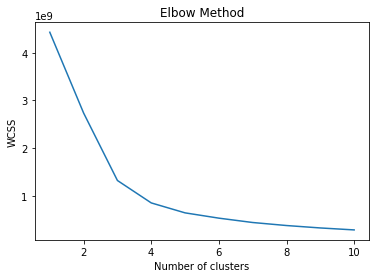

In [39]:
###Bonus
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame 'data'
# Selecting numerical columns for K-means
numerical_data = data.select_dtypes(include=['number'])

# Finding the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(numerical_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fit K-means with the optimal number of clusters
optimal_clusters = 3  # Replace this with the number you find optimal
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(numerical_data)

# Add cluster information back to the original dataframe
data['Cluster'] = clusters





In [40]:
##Comparing Different Supervised Algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Prepare the data
X = data.drop('y', axis=1)  # Assuming 'y' is the target variable
y = data['y']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"{name} Accuracy: {accuracy}")


C:\Users\amuje\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.9102532977259853
Decision Tree Accuracy: 0.889698146799385
Random Forest Accuracy: 0.9148660678158129
SVM Accuracy: 0.8970623937848993
